In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Gera um gráfico de pizza para mostrar a proporção de gênero na turma.
def graphic_by_sex(data):
  genero_counts = data['sexo'].value_counts()  # Conta ocorrências de cada gênero
  plt.figure(figsize=(8, 8))
  plt.pie(genero_counts, labels=genero_counts.index, autopct='%1.1f%%', colors=['blue', 'red'])
  plt.title('Proporção de Gênero na Turma')
  plt.show()

# Gera um gráfico de barras mostrando a média de rendimento de cada aluno.
def graphic_by_students(data):
  data['media'] = data[['nota1', 'nota2', 'nota3', 'nota4']].mean(axis=1)  # Calcula a média de cada aluno
  media_alunos = data.groupby('nome')['media'].mean()  # Agrupa por nome e calcula média

  plt.figure(figsize=(10, 6))
  media_alunos.plot(kind='bar', color='skyblue')
  plt.title('Média de rendimento por aluno')
  plt.xlabel('Nome do Aluno')
  plt.ylabel('Média')
  plt.xticks(rotation=45)
  plt.show()

# Gera um histograma para mostrar a distribuição das médias das notas.
def graphic_mean_frequency(data):
  data['media'] = data[['nota1', 'nota2', 'nota3', 'nota4']].mean(axis=1)  # Calcula a média de cada aluno

  plt.figure(figsize=(10, 6))
  plt.hist(data['media'], bins=10, color='purple', alpha=0.7)  # Cria histograma
  plt.title('Distribuição das Médias das Notas')
  plt.xlabel('Média')
  plt.ylabel('Frequência')
  plt.show()

# Gera um relatório geral para os dados, com gráficos de pizza, barras e histograma
def generate_pdf(data):
  if not os.path.exists('reports'):
    os.mkdir('reports')  # Cria o diretório 'reports' caso não exista

  with PdfPages('reports/relatorio_graficos.pdf') as pdf:
  # Adiciona um gráfico de pizza com a proporção de gênero
    genero_counts = data['sexo'].value_counts()
    plt.figure(figsize=(10, 6))
    plt.pie(genero_counts, labels=genero_counts.index, autopct='%1.1f%%', colors=['blue', 'red'])
    plt.title('Proporção de Gênero na Turma')
    pdf.savefig()  # Salva a página no PDF
    plt.close()

    # Adiciona gráfico de barras com a média de rendimento dos alunos
    data['media'] = data[['nota1', 'nota2', 'nota3', 'nota4']].mean(axis=1)
    media_alunos = data.groupby('nome')['media'].mean()
    plt.figure(figsize=(10, 6))
    media_alunos.plot(kind='bar', color='skyblue')
    plt.title('Média de rendimento por aluno')
    plt.xlabel('Nome do Aluno')
    plt.ylabel('Média')
    plt.xticks(rotation=45)
    pdf.savefig()
    plt.close()

    # Adiciona um histograma com a distribuição das médias das notas
    plt.figure(figsize=(10, 6))
    plt.hist(data['media'], bins=10, color='purple', alpha=0.7)
    plt.title('Distribuição das Médias das Notas')
    plt.xlabel('Média')
    plt.ylabel('Frequência')
    plt.tight_layout()
    pdf.savefig()
    plt.close()

# Define o gráfico selecionado pelo usuário, a partir da opção desejada
def generate_earnings_class(data, option):
  match option:
    case 1:
        print(data)
    case 2:
        graphic_by_sex(data)
    case 3:
        graphic_by_students(data)
    case 4:
        graphic_mean_frequency(data)
    case 5:
        generate_pdf(data)
    case _ :
        print('')

In [2]:
import pandas as pd

def generate_search_students(data, option):
# Matrícula ------------------------------------------------
    if option == 1:

        numero_matricula = int(input('Digite o numero de matrícula: '))
        aluno_por_matricula = data[data['matricula'] == numero_matricula]

        if not aluno_por_matricula.empty:
            print(aluno_por_matricula[['matricula', 'nome', 'sexo', 'nota1', 'nota2', 'nota3', 'nota4']])
        else:
            print('\nNÚMERO DE MATRÍCULA NÃO ENCONTRADO!')

# Nome -------------------------------------------------------------------

    elif option == 2:
        nome_aluno = input('Digite o nome do aluno: ').capitalize()
        por_nome = data[data['nome'] == nome_aluno]

        if not por_nome.empty:
            print(por_nome[['matricula', 'nome', 'sexo', 'nota1', 'nota2', 'nota3', 'nota4']])
        else:
            print('\nALUNO NÃO ENCONTRADO')

# Sexo -------------------------------------------------

    elif option == 3:
        sexo_aluno = input('Por qual sexo deseja buscar: ').capitalize()
        por_sexo = data[data['sexo'] == sexo_aluno]

        if not por_sexo.empty:
            print(por_sexo[['matricula', 'nome', 'sexo', 'nota1', 'nota2', 'nota3', 'nota4']])
        else:
            print('PESQUISA NÃO ENCONTRADA')

# Status --------------------------------------------------------

    elif option == 4:
        data['media'] = data[['nota1', 'nota2', 'nota3', 'nota4']].mean(axis=1)
        data['status'] = data['media'].apply(lambda media: 'aprovado' if media >= 6 else 'reprovado')
        s_aluno = input('Status dos alunos deseja observar: ').lower()
        por_status = data[data['status'] == s_aluno]

        if not por_status.empty:
            print(por_status[['matricula', 'nome', 'sexo', 'nota1', 'nota2', 'nota3', 'nota4']])
        else:
            print('PESQUISA NÃO ENCONTRADA')
    else:
        print('\033[31mOpção inválida, digite novamente.\033[0m')


In [3]:
import os
import pandas as pd

def generate_reports(data, option):
    alunos = data
    alunos_dicionario = alunos.to_dict()
    alunos_dicionario['media'] = {}
    alunos_dicionario['status'] = {}

    for x in range(len(alunos)):
        media = (alunos_dicionario['nota1'][x] + alunos_dicionario['nota2'][x] + alunos_dicionario['nota3'][x] + alunos_dicionario['nota4'][x]) / 4
        alunos_dicionario['media'][x] = media
        alunos_dicionario['status'][x] = 'APROVADO' if media >= 7 else 'REPROVADO'

    if not os.path.exists('reports'):
        os.mkdir('reports')

    if option == 1:
        with open('reports/relatorio.txt', 'w') as arq:
            for x in range(len(alunos)):
                arq.write(f"{alunos_dicionario['nome'][x]} {alunos_dicionario['media'][x]} {alunos_dicionario['status'][x]}\n")

    elif option == 2:
        with open('reports/relatorio.md', 'w') as f:
            f.write("## Relatório de Notas\n")
            f.write("""| Alunos    | Notas | Status
| -------- | ------- | ------- |\n""")
            for x in range(len(alunos)):
                f.write(f"|{alunos_dicionario['nome'][x]}|{alunos_dicionario['media'][x]}|{alunos_dicionario['status'][x]}\n")

    elif option == 3:
        alunos = pd.DataFrame(alunos_dicionario)
        alunos.to_excel('reports/relatorio.xlsx', index=False)

    else:
        print("\033[31mOpção inválida, digite novamente.\033[0m")


GERENCIADOR DE NOTAS
Digite o nome da planilha (Deve estar no diretório "sua_panilha"): aaa
MENU PRINCIPAL
[1] Realizar buscas
[2] Verificar rendimentos
[3] Gerar relatórios
[4] Sair
Escolha uma opção: 1
BUSCA DE ALUNOS
[1] Matrícula
[2] Nome
[3] Sexo
[4] Status
Escolha uma opção: 2
Digite o nome do aluno: Jonas
    matricula   nome       sexo  nota1  nota2  nota3  nota4
0      123456  Jonas  Masculino      8      9      8      9
3      123456  Jonas  Masculino      8      9      8      9
11     123456  Jonas  Masculino      8      9      8      9
14     123456  Jonas  Masculino      8      9      8      9
MENU PRINCIPAL
[1] Realizar buscas
[2] Verificar rendimentos
[3] Gerar relatórios
[4] Sair
Escolha uma opção: 3
MODELO DO RELATÓRIO
[1] TXT
[2] Markdown
[3] Xlsx
Escolha uma opção: 2
MENU PRINCIPAL
[1] Realizar buscas
[2] Verificar rendimentos
[3] Gerar relatórios
[4] Sair
Escolha uma opção: 2
RENDIMENTOS GERAIS
[1] Visualizar dados
[2] Distribuição com base no sexo
[3] Distribuição 

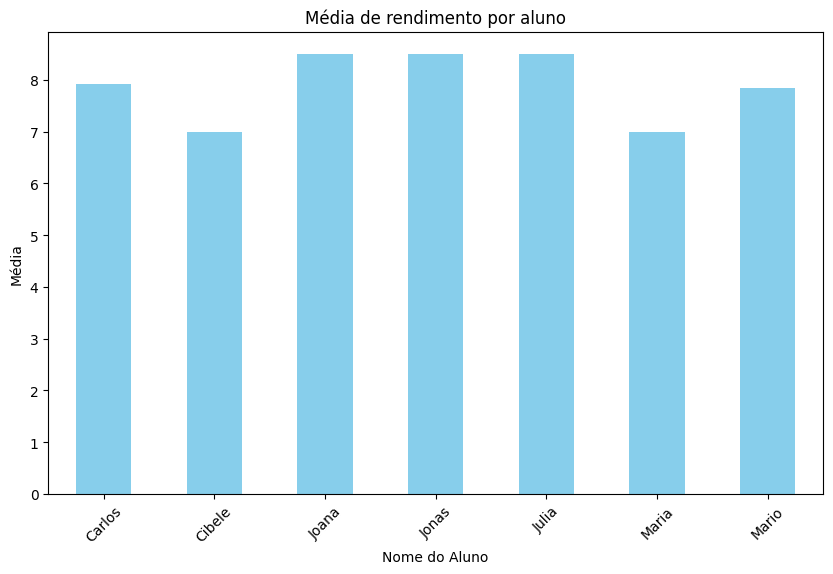

MENU PRINCIPAL
[1] Realizar buscas
[2] Verificar rendimentos
[3] Gerar relatórios
[4] Sair
Escolha uma opção: 4
Saindo...


In [ ]:
import os
import pandas as pd

def message_format(mensagem, tipo="info"):
    cores = {
        "info": "\033[1m",
        "erro": "\033[31m",
        "sucesso": "\033[32m"
    }
    print(f"{cores[tipo]}{mensagem.upper()}\033[0m")

#Exibe o menu e retorna a opção escolhida pelo usuário.
def menu(title, options):
    print(f"\033[1m{title}\033[0m")
    for x, option in enumerate(options, start=1):
        print(f"[{x}] {option}")
    try:
        return int(input("Escolha uma opção: "))
    except ValueError:
        return None

# Menu principal
def main_menu(data):
    while True:
        user_option = menu("MENU PRINCIPAL", ["Realizar buscas", "Verificar rendimentos", "Gerar relatórios", "Sair"])
        if user_option == 1:
            search_menu(data)
        elif user_option == 2:
            earnings_menu(data)
        elif user_option == 3:
            report_menu(data)
        elif user_option == 4:
            message_format("Saindo...", "info")
            break
        else:
            message_format("Opção inválida, digite novamente.", "erro")

# Definem a função de cada um dos menus, além de adicionar o fluxo de retorno
def search_menu(data):
    option = menu("BUSCA DE ALUNOS", ["Matrícula", "Nome", "Sexo", "Status", "Voltar"])
    if option in range(1, 5):
      generate_search_students(data, option)
    elif option == 5:
        return
    else:
        message_format("Opção inválida, retornando ao menu principal.", "erro")

def earnings_menu(data):
    option = menu("RENDIMENTOS GERAIS", [
        "Visualizar dados", "Distribuição com base no sexo",
        "Distribuição das médias por aluno", "Distribuição com base na frequência de médias",
        "Gerar relatório geral das análises", "Voltar"
    ])
    if option in range(1, 6):
        generate_earnings_class(data, option)
    elif option == 6:
        return
    else:
        message_format("Opção inválida, retornando ao menu principal.", "erro")

def report_menu(data):
    option = menu("MODELO DO RELATÓRIO", ["TXT", "Markdown", "Xlsx", "Voltar"])
    if option in range(1, 4):
        generate_reports(data, option)
    elif option == 4:
        return
    else:
        message_format("Opção inválida, retornando ao menu principal.", "erro")

# Carrega os dados da planilha, se o tipo tiver correto
def load_data(type_sheet, name_sheet):
    path = f"/content/{name_sheet}.{type_sheet}"
    try:
        if type_sheet == "xlsx":
            return pd.read_excel(path, sheet_name='notas')
        elif type_sheet == "csv":
            return pd.read_csv(path)
        message_format("Arquivo encontrado.", "sucesso")
    except FileNotFoundError:
        message_format("Planilha não encontrada.", "erro")
    except Exception as e:
        message_format(f"Erro ao carregar o arquivo: {str(e)}", "erro")
    return None

# Encapsula todo o código em uma função para ser chamada no início
def init_project():
    message_format("GERENCIADOR DE NOTAS", "info")
    type_sheet = input('Digite o tipo de arquivo (xlsx ou csv): ').strip().lower()

    if type_sheet not in ['xlsx', 'csv']:
        message_format("Tipo de arquivo inválido.", "erro")
        return

    name_sheet = input('Digite o nome da planilha (Deve estar no diretório "sua_planilha"): ').strip()

    data = load_data(type_sheet, name_sheet)
    if data is not None:
        main_menu(data)

# Execução principal
if __name__ == "__main__":
    init_project()